## Zad.1

In [37]:
import numpy as np
import pandas as pd

In [38]:
moja_lista = []
for i in range(1,11):
    moja_lista.append((np.random.randint(1,11),np.random.randint(1,11)))

print(moja_lista)

[(8, 7), (5, 5), (10, 8), (7, 2), (4, 7), (4, 8), (3, 6), (10, 5), (5, 6), (2, 8)]


In [39]:
def dzialanie(moja_lista):
    output = []
    for i in range(0,10):
        output.append(moja_lista[i][0] ** moja_lista[i][1])
    print(output)

In [40]:
dzialanie(moja_lista)

[2097152, 3125, 100000000, 49, 16384, 65536, 729, 100000, 15625, 256]


## Zad.2 

In [41]:
df = pd.DataFrame(moja_lista,columns=['x1','y1'])
df

,x1,y1
0,8,7
1,5,5
2,10,8
3,7,2
4,4,7
5,4,8
6,3,6
7,10,5
8,5,6
9,2,8


In [42]:
df["x1^y1"]= df["x1"]**df["y1"]
df

,x1,y1,x1^y1
0,8,7,2097152
1,5,5,3125
2,10,8,100000000
3,7,2,49
4,4,7,16384
5,4,8,65536
6,3,6,729
7,10,5,100000
8,5,6,15625
9,2,8,256


## Zad.3

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import trange
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
wine = pd.read_csv("/Users/Filip/Desktop/jdsz1-materialy-python/python-01/input/wine_data.csv", 
                   index_col=False, names=['Class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline'])
wine.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
X = wine.drop(columns=["Class"])
y = wine["Class"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [6]:
best_score = 0
parameters = {}

In [7]:
for depth in range (1, 11):
    for depth in trange (1, 11):
        for min_split in range(2, 11):
             for min_leaf in range(1, 11):
                for criterion in ["gini", "entropy"]:
                    classifier = DecisionTreeClassifier(max_depth = depth, min_samples_split = min_split, 
                                                     min_samples_leaf = min_leaf, criterion = criterion)
                    scores = cross_val_score(classifier, X_train, y_train, cv = 5)
                    if scores.mean() > best_score:
                        parameters["best_depth"] = depth
                        parameters["best_min_split"] = min_split
                        parameters["best_min_leaf"] = min_leaf
                        parameters["best_criterion"] = criterion
                        best_score = scores.mean()
                        print("Accuracy: {}".format(scores.mean()))
                        print("max_depth: {}, min_samples_split: {}, min_samples_leaf: {}, criterion: {}".format(depth,
                                                                                                                 min_split,
                                                                                                                 min_leaf,
                                                                                                                 criterion))

  0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: 0.6201970443349755
max_depth: 1, min_samples_split: 2, min_samples_leaf: 1, criterion: gini


 10%|█         | 1/10 [00:02<00:26,  2.92s/it]

Accuracy: 0.8876847290640395
max_depth: 2, min_samples_split: 2, min_samples_leaf: 1, criterion: gini
Accuracy: 0.9086206896551724
max_depth: 2, min_samples_split: 2, min_samples_leaf: 6, criterion: entropy
Accuracy: 0.9157635467980295
max_depth: 2, min_samples_split: 2, min_samples_leaf: 8, criterion: entropy
Accuracy: 0.9229064039408869
max_depth: 2, min_samples_split: 2, min_samples_leaf: 9, criterion: entropy


 20%|██        | 2/10 [00:05<00:21,  2.75s/it]

Accuracy: 0.9366995073891626
max_depth: 3, min_samples_split: 2, min_samples_leaf: 1, criterion: gini
Accuracy: 0.9435960591133006
max_depth: 3, min_samples_split: 2, min_samples_leaf: 9, criterion: entropy


 30%|███       | 3/10 [00:08<00:18,  2.71s/it]

Accuracy: 0.9440886699507389
max_depth: 4, min_samples_split: 9, min_samples_leaf: 2, criterion: entropy


 40%|████      | 4/10 [00:10<00:16,  2.67s/it]

Accuracy: 0.9509852216748769
max_depth: 5, min_samples_split: 8, min_samples_leaf: 2, criterion: entropy


 60%|██████    | 6/10 [00:16<00:10,  2.68s/it]

Accuracy: 0.951231527093596
max_depth: 7, min_samples_split: 3, min_samples_leaf: 1, criterion: entropy


 50%|█████     | 5/10 [00:13<00:13,  2.63s/it]

Accuracy: 0.9514778325123153
max_depth: 6, min_samples_split: 9, min_samples_leaf: 1, criterion: entropy


 40%|████      | 4/10 [00:10<00:15,  2.53s/it]

Accuracy: 0.9583743842364532
max_depth: 5, min_samples_split: 10, min_samples_leaf: 1, criterion: entropy


100%|██████████| 10/10 [00:26<00:00,  2.66s/it]


In [8]:
parameters

{'best_depth': 5,
 'best_min_split': 10,
 'best_min_leaf': 1,
 'best_criterion': 'entropy'}

In [9]:
drzewo = DecisionTreeClassifier(criterion = parameters["best_criterion"], max_depth = parameters["best_depth"], min_samples_split = parameters["best_min_split"], min_samples_leaf = parameters["best_min_leaf"])

In [10]:
drzewo.fit(X = X_train, y = y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
predykcja = drzewo.predict(X_test)

In [12]:
rezultat = pd.DataFrame({"y_true":y_test, "y_pred":predykcja})

In [13]:
rezultat

,y_true,y_pred
76,2,2
48,1,1
27,1,3
6,1,1
1,1,1
82,2,2
34,1,1
116,2,2
164,3,3
142,3,3


In [14]:
cm_drzewo = confusion_matrix(y_true = rezultat["y_true"], y_pred = rezultat["y_pred"])
cm_drzewo

array([[11,  0,  1],
       [ 1, 14,  1],
       [ 0,  0,  8]])

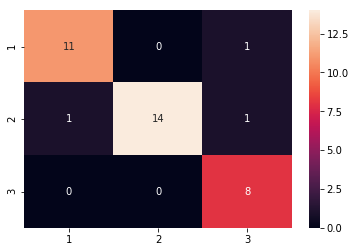

In [15]:
sns.heatmap(cm_drzewo, annot = True, fmt="d", xticklabels=['1','2','3'], yticklabels=['1','2','3'])

In [16]:
accuracy_score(y_true = rezultat["y_true"], y_pred = rezultat["y_pred"])

0.9166666666666666

## Zad.4

In [17]:
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import StratifiedKFold 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [24]:
wines = pd.read_csv("/Users/Filip/Desktop/jdsz1-materialy-python/python-01/input/winequality-white.csv", sep=';')

In [25]:
wines.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [26]:
X = wines.drop(columns=["pH"])
y = wines["pH"]

In [27]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,0.40,9.9,6


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
best_score = np.inf
parameters = {}

In [30]:
for depth in range (1,11):
    for min_split in range(2,21):
        for min_leaf in range(1,21):
            regressor = DecisionTreeRegressor(max_depth = depth,
                                              min_samples_split = min_split,
                                              min_samples_leaf = min_leaf)
            scores = cross_val_score(regressor, X, y, cv = 5)
            print("MSE: {} (std {})".format(scores.mean(), scores.std()))
            if scores.mean() < 0:
                pass
            elif scores.mean() < best_score:
                print("New best parameters!")
                parameters["best_depth"] = depth
                parameters["best_min_split"] = min_split
                parameters["best_min_leaf"] = min_leaf
                best_score = scores.mean()

MSE: 0.04723699017743587 (std 0.03830376219880918)
New best parameters!
MSE: 0.04723699017743073 (std 0.038303762198817724)
New best parameters!
MSE: 0.047236990177436364 (std 0.03830376219881073)
MSE: 0.04723699017743708 (std 0.038303762198813)
MSE: 0.047236990177432416 (std 0.03830376219882084)
MSE: 0.04723699017744239 (std 0.038303762198814054)
MSE: 0.04723699017743912 (std 0.03830376219880857)
MSE: 0.047236990177434525 (std 0.03830376219880642)
MSE: 0.04723699017742875 (std 0.03830376219881357)
New best parameters!
MSE: 0.04723699017742957 (std 0.03830376219881548)
MSE: 0.04723699017743417 (std 0.03830376219881247)
MSE: 0.04723699017743164 (std 0.03830376219881009)
MSE: 0.047236990177439965 (std 0.03830376219882001)
MSE: 0.047236990177431125 (std 0.03830376219881333)
MSE: 0.04723699017743066 (std 0.0383037621988171)
MSE: 0.04723699017742886 (std 0.03830376219881928)
MSE: 0.047236990177432193 (std 0.03830376219881655)
MSE: 0.04723699017743179 (std 0.03830376219881854)
MSE: 0.0472369

MSE: 0.04723699017744187 (std 0.03830376219880301)
MSE: 0.04723699017742719 (std 0.03830376219881285)
MSE: 0.04723699017743728 (std 0.03830376219880967)
MSE: 0.04723699017743137 (std 0.038303762198815976)
MSE: 0.04723699017742981 (std 0.038303762198806574)
MSE: 0.04723699017743781 (std 0.03830376219880521)
MSE: 0.04723699017742435 (std 0.038303762198825975)
MSE: 0.04723699017744085 (std 0.03830376219880882)
MSE: 0.04723699017743695 (std 0.03830376219880898)
MSE: 0.04723699017744731 (std 0.03830376219880605)
MSE: 0.047236990177423374 (std 0.03830376219883048)
MSE: 0.04723699017742868 (std 0.038303762198815365)
MSE: 0.047236990177447716 (std 0.03830376219880792)
MSE: 0.04723699017743797 (std 0.03830376219880037)
MSE: 0.047236990177422465 (std 0.03830376219882165)
MSE: 0.04723699017742777 (std 0.038303762198816795)
MSE: 0.047236990177433255 (std 0.038303762198817135)
MSE: 0.047236990177431146 (std 0.03830376219882119)
MSE: 0.04723699017744145 (std 0.03830376219881683)
MSE: 0.0472369901774

MSE: 0.04723699017744474 (std 0.03830376219881295)
MSE: 0.047236990177434546 (std 0.038303762198812985)
MSE: 0.04723699017744656 (std 0.038303762198816226)
MSE: 0.04723699017744891 (std 0.03830376219881761)
MSE: 0.047236990177426864 (std 0.03830376219881933)
MSE: 0.047236990177435344 (std 0.03830376219881435)
MSE: 0.047236990177437745 (std 0.03830376219882207)
MSE: 0.047236990177425775 (std 0.03830376219882387)
MSE: 0.047236990177437675 (std 0.038303762198822526)
MSE: 0.04723699017743188 (std 0.03830376219881619)
MSE: 0.0472369901774307 (std 0.038303762198809176)
MSE: 0.04723699017743297 (std 0.038303762198805075)
MSE: 0.04723699017743734 (std 0.03830376219882201)
MSE: 0.04723699017743066 (std 0.038303762198819216)
MSE: 0.04723699017743628 (std 0.038303762198811965)
MSE: 0.04723699017743186 (std 0.03830376219881163)
MSE: 0.047236990177439854 (std 0.03830376219881341)
MSE: 0.0472369901774383 (std 0.038303762198816114)
MSE: 0.04723699017743828 (std 0.03830376219881504)
MSE: 0.04723699017

MSE: 0.08279946236014571 (std 0.046066498392572174)
MSE: 0.0827994623601493 (std 0.046066498392580375)
MSE: 0.08279946236014195 (std 0.046066498392589084)
MSE: 0.08279946236013838 (std 0.046066498392582984)
MSE: 0.08279946236014842 (std 0.046066498392581416)
MSE: 0.08279946236014255 (std 0.04606649839257928)
MSE: 0.08279946236013944 (std 0.046066498392582506)
MSE: 0.08279946236013888 (std 0.046066498392575164)
MSE: 0.08279946236014386 (std 0.04606649839257609)
MSE: 0.08279946236013594 (std 0.04606649839258004)
MSE: 0.08279946236013773 (std 0.04606649839258133)
MSE: 0.08279946236014664 (std 0.046066498392576656)
MSE: 0.08279946236013472 (std 0.04606649839258329)
MSE: 0.08279946236013677 (std 0.04606649839258601)
MSE: 0.08279946236013809 (std 0.04606649839257692)
MSE: 0.08279946236014712 (std 0.046066498392577905)
MSE: 0.08279946236013062 (std 0.04606649839258449)
MSE: 0.0827994623601448 (std 0.046066498392582644)
MSE: 0.08279946236013733 (std 0.04606649839257814)
MSE: 0.0827994623601446

MSE: 0.08279946236014005 (std 0.0460664983925774)
MSE: 0.08279946236014124 (std 0.04606649839257401)
MSE: 0.08279946236014317 (std 0.046066498392578606)
MSE: 0.08279946236013673 (std 0.04606649839258409)
MSE: 0.0827994623601332 (std 0.046066498392593816)
MSE: 0.08279946236013584 (std 0.046066498392584164)
MSE: 0.08279946236014638 (std 0.04606649839257414)
MSE: 0.08279946236013587 (std 0.04606649839258261)
MSE: 0.08279946236013776 (std 0.0460664983925875)
MSE: 0.08279946236014017 (std 0.046066498392577274)
MSE: 0.08279946236014772 (std 0.04606649839258321)
MSE: 0.08279946236014646 (std 0.046066498392577655)
MSE: 0.0827994623601421 (std 0.046066498392583526)
MSE: 0.08279946236013905 (std 0.04606649839257579)
MSE: 0.08279946236014032 (std 0.04606649839258188)
MSE: 0.08279946236014539 (std 0.046066498392573325)
MSE: 0.0827994623601406 (std 0.04606649839257896)
MSE: 0.08279946236015642 (std 0.0460664983925729)
MSE: 0.08279946236014628 (std 0.04606649839258156)
MSE: 0.08279946236012928 (std 

MSE: 0.1086876240881451 (std 0.07055606902125744)
MSE: 0.1086876240881492 (std 0.07055606902125641)
MSE: 0.10868762408815365 (std 0.07055606902125487)
MSE: 0.10868762408814434 (std 0.07055606902126405)
MSE: 0.10868762408813712 (std 0.0705560690212615)
MSE: 0.10868762408814422 (std 0.07055606902126128)
MSE: 0.10868762408814336 (std 0.07055606902125997)
MSE: 0.10868762408814674 (std 0.07055606902125493)
MSE: 0.10868762408814318 (std 0.07055606902125963)
MSE: 0.10868762408814714 (std 0.07055606902125734)
MSE: 0.10868762408814928 (std 0.07055606902125515)
MSE: 0.10868762408814167 (std 0.07055606902126249)
MSE: 0.10868762408814533 (std 0.07055606902125887)
MSE: 0.10868762408814447 (std 0.07055606902125865)
MSE: 0.108687624088143 (std 0.07055606902126067)
MSE: 0.10868762408814418 (std 0.0705560690212593)
MSE: 0.10868762408814052 (std 0.07055606902125972)
MSE: 0.1086876240881403 (std 0.07055606902126578)
MSE: 0.10868762408814818 (std 0.07055606902126021)
MSE: 0.10868762408814563 (std 0.070556

MSE: 0.108687624088146 (std 0.07055606902125208)
MSE: 0.10868762408814185 (std 0.070556069021259)
MSE: 0.10868762408814914 (std 0.0705560690212542)
MSE: 0.10868762408814354 (std 0.07055606902125404)
MSE: 0.10868762408814274 (std 0.07055606902125809)
MSE: 0.10868762408814306 (std 0.0705560690212539)
MSE: 0.10868762408814392 (std 0.07055606902125997)
MSE: 0.10868762408813766 (std 0.07055606902126103)
MSE: 0.10868762408814696 (std 0.07055606902125608)
MSE: 0.10868762408814606 (std 0.07055606902125436)
MSE: 0.10868762408814572 (std 0.070556069021257)
MSE: 0.10868762408815229 (std 0.07055606902125748)
MSE: 0.10868762408815065 (std 0.07055606902126141)
MSE: 0.1086876240881451 (std 0.07055606902125407)
MSE: 0.10868762408814683 (std 0.07055606902125496)
MSE: 0.10868762408815089 (std 0.07055606902125998)
MSE: 0.10868762408814156 (std 0.07055606902125441)
MSE: 0.10868762408814651 (std 0.07055606902125289)
MSE: 0.1086876240881427 (std 0.07055606902125937)
MSE: 0.1086876240881457 (std 0.0705560690

MSE: 0.10868762408814683 (std 0.07055606902126002)
MSE: 0.10868762408814785 (std 0.0705560690212539)
MSE: 0.108687624088143 (std 0.07055606902125679)
MSE: 0.10868762408814889 (std 0.07055606902124993)
MSE: 0.10868762408814236 (std 0.07055606902125952)
MSE: 0.1261336803741932 (std 0.06928925191078707)
MSE: 0.12613368037419243 (std 0.06928925191078689)
MSE: 0.12613368037419437 (std 0.06928925191078474)
MSE: 0.12613368037419245 (std 0.06928925191078603)
MSE: 0.1261336803741927 (std 0.06928925191078461)
MSE: 0.12433857597735905 (std 0.06651452683821742)
MSE: 0.12433857597736084 (std 0.06651452683821772)
MSE: 0.12433857597736038 (std 0.06651452683821585)
MSE: 0.1243385759773605 (std 0.0665145268382192)
MSE: 0.12433857597736167 (std 0.06651452683821557)
MSE: 0.12498060654628576 (std 0.06566903123510798)
MSE: 0.12498060654628629 (std 0.06566903123510462)
MSE: 0.1253763855197354 (std 0.06542418231241752)
MSE: 0.12537638551973923 (std 0.06542418231241715)
MSE: 0.1260602351320303 (std 0.06586589

MSE: 0.1265067346015657 (std 0.06855979292326264)
MSE: 0.12613368037419107 (std 0.069289251910788)
MSE: 0.12613368037418968 (std 0.06928925191078796)
MSE: 0.12613368037419143 (std 0.06928925191078598)
MSE: 0.1261336803741924 (std 0.06928925191078639)
MSE: 0.1261336803741932 (std 0.06928925191079306)
MSE: 0.12433857597736049 (std 0.0665145268382154)
MSE: 0.12433857597735405 (std 0.06651452683822132)
MSE: 0.1243385759773552 (std 0.06651452683821835)
MSE: 0.12433857597735702 (std 0.0665145268382193)
MSE: 0.12433857597736056 (std 0.0665145268382163)
MSE: 0.12498060654628484 (std 0.06566903123510566)
MSE: 0.12498060654628344 (std 0.06566903123510978)
MSE: 0.12537638551973618 (std 0.06542418231242039)
MSE: 0.12537638551973498 (std 0.06542418231242042)
MSE: 0.12606023513203174 (std 0.06586589716833545)
MSE: 0.1260088034088732 (std 0.0667400540468812)
MSE: 0.12614704464594803 (std 0.06683133209639505)
MSE: 0.12489981566972878 (std 0.06695035752161657)
MSE: 0.12606877481226397 (std 0.0691038843

MSE: 0.12613368037419734 (std 0.06928925191078614)
MSE: 0.12613368037419428 (std 0.06928925191078517)
MSE: 0.12433857597735971 (std 0.06651452683821811)
MSE: 0.1243385759773576 (std 0.06651452683822093)
MSE: 0.12433857597735667 (std 0.06651452683821589)
MSE: 0.12433857597735742 (std 0.06651452683822097)
MSE: 0.12433857597735602 (std 0.06651452683822032)
MSE: 0.12498060654628207 (std 0.06566903123510615)
MSE: 0.12498060654628831 (std 0.06566903123510551)
MSE: 0.12537638551974034 (std 0.06542418231242197)
MSE: 0.12537638551973704 (std 0.0654241823124195)
MSE: 0.12606023513203515 (std 0.06586589716834178)
MSE: 0.1260088034088719 (std 0.06674005404688327)
MSE: 0.1261470446459416 (std 0.06683133209639291)
MSE: 0.12489981566973278 (std 0.06695035752161595)
MSE: 0.1260687748122685 (std 0.06910388430044292)
MSE: 0.12650673460156606 (std 0.06855979292325977)
MSE: 0.12613368037419587 (std 0.06928925191078925)
MSE: 0.12613368037419287 (std 0.06928925191078915)
MSE: 0.12613368037418965 (std 0.0692

MSE: 0.11554727388021338 (std 0.07187711742269647)
MSE: 0.11609422920136336 (std 0.07082394966786178)
MSE: 0.11687472230829392 (std 0.0701772256508747)
MSE: 0.11697187335611958 (std 0.07018978123163382)
MSE: 0.12056752513243482 (std 0.06917906165436565)
MSE: 0.12077777326988766 (std 0.07023712657626333)
MSE: 0.12264818469446159 (std 0.06932877934704457)
MSE: 0.11976308432369931 (std 0.07382597300515824)
MSE: 0.11985391183164729 (std 0.07379310658588033)
MSE: 0.13472677639423883 (std 0.05984289568153272)
MSE: 0.1332963876552226 (std 0.06267406456760731)
MSE: 0.13466740747455155 (std 0.061134705249582165)
MSE: 0.10334402716962236 (std 0.06724034568413506)
MSE: 0.11348397695265351 (std 0.06682042881551753)
MSE: 0.11524498676249348 (std 0.06563076828772205)
MSE: 0.11346570992281717 (std 0.06692592282858723)
MSE: 0.11235601776374696 (std 0.06910396630581177)
MSE: 0.11127725475891717 (std 0.06743746630008753)
MSE: 0.11222093160720333 (std 0.06693282123790534)
MSE: 0.11402520731966921 (std 0.

MSE: 0.11710176592220194 (std 0.07019257811543407)
MSE: 0.12069741769852198 (std 0.06918775447839115)
MSE: 0.12077777326989014 (std 0.07023712657626337)
MSE: 0.1226481846944637 (std 0.06932877934704292)
MSE: 0.11976308432369794 (std 0.0738259730051599)
MSE: 0.1198539118316522 (std 0.07379310658588253)
MSE: 0.13472677639423675 (std 0.059842895681532345)
MSE: 0.13329638765521956 (std 0.06267406456760741)
MSE: 0.1346674074745527 (std 0.061134705249581735)
MSE: 0.10773267377233761 (std 0.06734933085188918)
MSE: 0.11800251612144871 (std 0.06626252500827719)
MSE: 0.11828031641044963 (std 0.06692970527025724)
MSE: 0.11590237566760404 (std 0.06751258519804845)
MSE: 0.1148581110057791 (std 0.06964947460372632)
MSE: 0.11411075255341778 (std 0.0681687332382906)
MSE: 0.1151820631851003 (std 0.07096905493243422)
MSE: 0.1138953147535843 (std 0.0727900070538163)
MSE: 0.11554727388021331 (std 0.07187711742269574)
MSE: 0.11622412176744827 (std 0.0708270024222179)
MSE: 0.11700461487437834 (std 0.0701788

MSE: 0.1196003140105472 (std 0.06351191577158218)
MSE: 0.11799376331384068 (std 0.06373115257834032)
MSE: 0.13300194928001174 (std 0.05903807406984144)
MSE: 0.13081381767322878 (std 0.057299191879831006)
MSE: 0.13099616567783567 (std 0.05527366918796989)
MSE: 0.10517695293950731 (std 0.055569320117357414)
MSE: 0.10991326346833377 (std 0.06531776112124982)
MSE: 0.10819919483430315 (std 0.05464830266241903)
MSE: 0.10386394694389986 (std 0.058344185380572774)
MSE: 0.1088770527216546 (std 0.06060546821641755)
MSE: 0.11295869212150104 (std 0.0609590888085678)
MSE: 0.10908187288828815 (std 0.06339899635263299)
MSE: 0.11467789560105564 (std 0.06504881242176366)
MSE: 0.11340197328642643 (std 0.0638646637445637)
MSE: 0.1115315266434416 (std 0.06372881395689418)
MSE: 0.11093632637272186 (std 0.06554917114723048)
MSE: 0.11031193248602025 (std 0.06559764391044685)
MSE: 0.11354256865931825 (std 0.0640256505615854)
MSE: 0.11745161487031261 (std 0.06537775682926059)
MSE: 0.12119140203264381 (std 0.06

MSE: 0.13300194928001113 (std 0.05903807406984358)
MSE: 0.13081381767322797 (std 0.057299191879832595)
MSE: 0.13086439828779603 (std 0.05525635842447068)
MSE: 0.09361360160694976 (std 0.056681657296552605)
MSE: 0.10100441884059215 (std 0.06314664514834255)
MSE: 0.10946071577940764 (std 0.05622102543315879)
MSE: 0.10594275658759436 (std 0.05722999274854874)
MSE: 0.10723835576655578 (std 0.0595421457097287)
MSE: 0.11039668815681294 (std 0.05902280542281945)
MSE: 0.10908187288828715 (std 0.06339899635263453)
MSE: 0.11685332097663992 (std 0.06279051024823092)
MSE: 0.11253306212200527 (std 0.06453526312555737)
MSE: 0.11153152664344083 (std 0.06372881395689814)
MSE: 0.11080643380663573 (std 0.06560529022988532)
MSE: 0.1103119324860222 (std 0.06559764391044644)
MSE: 0.11341267609323395 (std 0.06406093438343846)
MSE: 0.11745161487031475 (std 0.06537775682925737)
MSE: 0.12119140203264314 (std 0.061424469395429275)
MSE: 0.11960031401054913 (std 0.06351191577158226)
MSE: 0.11799376331384073 (std 

MSE: 0.0848062859770515 (std 0.06669231804895083)
MSE: 0.114030508338791 (std 0.06863678703916641)
MSE: 0.12081599943706078 (std 0.06698111009413622)
MSE: 0.12033780339779913 (std 0.06589904211701791)
MSE: 0.11594747948531195 (std 0.0727879979013305)
MSE: 0.12109724131306017 (std 0.07224995339410341)
MSE: 0.12546449285543307 (std 0.07464022236649856)
MSE: 0.12763097824099973 (std 0.06994527055819025)
MSE: 0.12025059442046533 (std 0.06449597532441916)
MSE: 0.11958763755912578 (std 0.06778906983808014)
MSE: 0.12048664099538042 (std 0.06954600895265592)
MSE: 0.11859663657696815 (std 0.07020619396358403)
MSE: 0.11908262076519409 (std 0.0714691232085092)
MSE: 0.12291873057314166 (std 0.07076780753941352)
MSE: 0.12249367781177707 (std 0.06602253161407359)
MSE: 0.12186332680171144 (std 0.06856238239942583)
MSE: 0.12040547038791952 (std 0.06718875381463157)
MSE: 0.13987708092299073 (std 0.06835997006905796)
MSE: 0.139528883765972 (std 0.06216213406731475)
MSE: 0.1427697586165248 (std 0.0610927

MSE: 0.11785612957430644 (std 0.06869404461808547)
MSE: 0.11953347923456778 (std 0.07329183337720845)
MSE: 0.12214934735761451 (std 0.07187725735192592)
MSE: 0.12645014786111863 (std 0.06983405850925373)
MSE: 0.12750108567491414 (std 0.07005362841449685)
MSE: 0.12012070185437891 (std 0.06459007987320783)
MSE: 0.12078204857748678 (std 0.06736111103704587)
MSE: 0.11942212254310618 (std 0.06992401504667362)
MSE: 0.1185966365769678 (std 0.07020619396358509)
MSE: 0.11895272819910903 (std 0.07156337029334975)
MSE: 0.12291873057314155 (std 0.07076780753941347)
MSE: 0.12249367781177689 (std 0.06602253161407216)
MSE: 0.12300601632008704 (std 0.06998949167443667)
MSE: 0.12040547038791886 (std 0.06718875381463098)
MSE: 0.13860262401458062 (std 0.0668828067774326)
MSE: 0.14067157328434746 (std 0.06368952929427243)
MSE: 0.14276975861652447 (std 0.0610927229650461)
MSE: 0.1117467665987282 (std 0.07562139039088298)
MSE: 0.11723803299835463 (std 0.07310354421193399)
MSE: 0.12093108431457256 (std 0.064

MSE: 0.12369141519374369 (std 0.06686961430492988)
MSE: 0.1209896130188016 (std 0.06423899158194957)
MSE: 0.11971753012521191 (std 0.0676807186128675)
MSE: 0.11942212254310532 (std 0.06992401504667324)
MSE: 0.11859663657696709 (std 0.07020619396358407)
MSE: 0.11893071559337098 (std 0.07157942327136275)
MSE: 0.12291873057314144 (std 0.07076780753941288)
MSE: 0.12249367781177636 (std 0.06602253161407284)
MSE: 0.12300601632008631 (std 0.06998949167443702)
MSE: 0.12040547038791902 (std 0.06718875381463212)
MSE: 0.13987708092299228 (std 0.06835997006905839)
MSE: 0.13966065115600726 (std 0.062277975030885356)
MSE: 0.14276975861652527 (std 0.061092722965046024)
MSE: 0.10417559304793148 (std 0.06742159570775473)
MSE: 0.1205635496235868 (std 0.07499009118879002)
MSE: 0.1191797800736912 (std 0.07235887795771741)
MSE: 0.11569457390222027 (std 0.07105896902230564)
MSE: 0.11967707220622752 (std 0.07377313691141413)
MSE: 0.12413160224865527 (std 0.07449854938221441)
MSE: 0.1248938079871655 (std 0.07

MSE: 0.11451460978797601 (std 0.08114544779143318)
MSE: 0.11324977913322376 (std 0.08269599492257747)
MSE: 0.11244633049766381 (std 0.08718565543901015)
MSE: 0.11815125467752827 (std 0.09850104194550365)
MSE: 0.1207185306070393 (std 0.09840886459639253)
MSE: 0.11644410767930732 (std 0.08929914018948812)
MSE: 0.11924319189636663 (std 0.09055569758851974)
MSE: 0.11815021429195194 (std 0.09185396919627897)
MSE: 0.12760137677071687 (std 0.09563199222683844)
MSE: 0.13237523144548127 (std 0.08234135198121087)
MSE: 0.13766256255903114 (std 0.0826851275891942)
MSE: 0.08731919870600935 (std 0.09515778815187272)
MSE: 0.09492958250748176 (std 0.08501078793690968)
MSE: 0.07847132254415175 (std 0.09322771111584904)
MSE: 0.09302605603450087 (std 0.09167746972450531)
MSE: 0.09508754579185708 (std 0.0915381453221034)
MSE: 0.1022652212745955 (std 0.09349268181402272)
MSE: 0.11151437977707565 (std 0.08665527472445608)
MSE: 0.11866961517285761 (std 0.08670874400687024)
MSE: 0.11224155983120418 (std 0.075

MSE: 0.11244633049766364 (std 0.08718565543901016)
MSE: 0.11802136211144354 (std 0.09854552811823881)
MSE: 0.12071853060703966 (std 0.09840886459639273)
MSE: 0.11920980455662264 (std 0.09139609519013613)
MSE: 0.12190981986108176 (std 0.09277697106939406)
MSE: 0.11548358632723665 (std 0.0900154682157019)
MSE: 0.12770044568331645 (std 0.09575475466087566)
MSE: 0.13328708466121986 (std 0.08386403362900209)
MSE: 0.1375634936464307 (std 0.0825408773185006)
MSE: 0.0814259471528713 (std 0.09070386110316328)
MSE: 0.0920512924750562 (std 0.09092179907404914)
MSE: 0.08567140867153675 (std 0.10756222806868017)
MSE: 0.09558185106196893 (std 0.10302165881915783)
MSE: 0.10131302084755775 (std 0.09416020591911504)
MSE: 0.11209695223822083 (std 0.09477906592904484)
MSE: 0.1182304555278759 (std 0.08882617841440586)
MSE: 0.11850452285744968 (std 0.0867760404059848)
MSE: 0.11240665214661147 (std 0.07567812778932904)
MSE: 0.11396888263759901 (std 0.08065628856892607)
MSE: 0.11266885223352407 (std 0.082210

MSE: 0.1289101333445383 (std 0.09753619934481911)
MSE: 0.12734997785413565 (std 0.09757754646775199)
MSE: 0.12350791848268339 (std 0.08512199884311902)
MSE: 0.13845947799777222 (std 0.0834978083792017)
MSE: 0.13000701979448276 (std 0.08165627566440271)
MSE: 0.13347266947660558 (std 0.09265516466590808)
MSE: 0.1442464747524707 (std 0.08293082318378234)
MSE: 0.1440816896205383 (std 0.07712128118077992)
MSE: 0.024052701703208522 (std 0.0938619031156868)
MSE: 0.0656095466331699 (std 0.09346757159573317)
MSE: 0.06494782564231302 (std 0.09382666792899245)
MSE: 0.0794717735553337 (std 0.09628704345008282)
MSE: 0.0861657804728642 (std 0.09220998139224192)
MSE: 0.08800679644609802 (std 0.09221753930023652)
MSE: 0.10594713854928403 (std 0.08101025015462925)
MSE: 0.1200422655964594 (std 0.08399786795527243)
MSE: 0.12372750186243334 (std 0.06631197759982069)
MSE: 0.11361266294934165 (std 0.0757194420375679)
MSE: 0.10870804777484959 (std 0.08767825635827839)
MSE: 0.1153194709089719 (std 0.091602480

MSE: 0.1257018922534703 (std 0.08675048447749549)
MSE: 0.13997299426870083 (std 0.08531235660250017)
MSE: 0.1323000624778702 (std 0.08343024780778317)
MSE: 0.13343997099916952 (std 0.09268048291435943)
MSE: 0.14310378523409595 (std 0.08115033889607445)
MSE: 0.14408168962053877 (std 0.07712128118078024)
MSE: 0.03655578900128764 (std 0.09189339508205714)
MSE: 0.06407369513837877 (std 0.08765246650802401)
MSE: 0.07128453200365432 (std 0.1036363605664648)
MSE: 0.08704532064857226 (std 0.09036977515546388)
MSE: 0.0880185986094258 (std 0.08865890859778433)
MSE: 0.08698875451273533 (std 0.09345896996834376)
MSE: 0.10403729934816411 (std 0.08442334788818923)
MSE: 0.11770624599339863 (std 0.08713448285259963)
MSE: 0.1205676247562772 (std 0.062091949595072665)
MSE: 0.11752749798461862 (std 0.07871180707731963)
MSE: 0.10870804777484866 (std 0.08767825635827892)
MSE: 0.11535467065829383 (std 0.09158080903426591)
MSE: 0.12910266154648228 (std 0.0974540779062693)
MSE: 0.12734613061844977 (std 0.0976

MSE: 0.1345826605175442 (std 0.09415561534902894)
MSE: 0.1421515698942836 (std 0.08178991321317047)
MSE: 0.14398262070793913 (std 0.07696365174667542)
MSE: -0.03405114498102315 (std 0.14487221299288774)
MSE: -0.011452577588138845 (std 0.12044591799590348)
MSE: 0.0017118392300315755 (std 0.1265811763151874)
New best parameters!
MSE: 0.02668498708085776 (std 0.13877150965778792)
MSE: 0.040772747983305366 (std 0.11116740742666457)
MSE: 0.05835040946981287 (std 0.11487941722190617)
MSE: 0.0677136666435337 (std 0.10321216011291241)
MSE: 0.10505679803127696 (std 0.08959474193708351)
MSE: 0.11048622585228021 (std 0.07394931961742193)
MSE: 0.10696888923604257 (std 0.08937788455607552)
MSE: 0.11140602879837916 (std 0.10375949083364139)
MSE: 0.11697989481170486 (std 0.09229579478399809)
MSE: 0.13527202350403444 (std 0.10349473209585522)
MSE: 0.13987802177183645 (std 0.10840120497207692)
MSE: 0.13030467041881708 (std 0.09445114861379679)
MSE: 0.14320935707220922 (std 0.10164910314853634)
MSE: 0.1

MSE: -0.017879066110252206 (std 0.13387489969399954)
MSE: 0.007507838073425188 (std 0.13621018082291664)
MSE: 0.016753527951489745 (std 0.1319399241765393)
MSE: 0.033746183749147354 (std 0.13681126482241446)
MSE: 0.03996168034593191 (std 0.12058169096303246)
MSE: 0.055307043507731656 (std 0.11896107857546083)
MSE: 0.06893898250557351 (std 0.10432835249229358)
MSE: 0.10501053264950606 (std 0.08960745821586222)
MSE: 0.11206629697791873 (std 0.0745464430432895)
MSE: 0.1080802770233509 (std 0.08800523521610813)
MSE: 0.11042453357715587 (std 0.10490694887938887)
MSE: 0.11706861934324553 (std 0.09225027598223175)
MSE: 0.13499022576612593 (std 0.10357429019819583)
MSE: 0.1424789520701366 (std 0.11128465696254597)
MSE: 0.13030467041881671 (std 0.0944511486137973)
MSE: 0.1408644179192417 (std 0.09927813268198685)
MSE: 0.1353776119852576 (std 0.09522297723720795)
MSE: 0.13776235132884407 (std 0.10493515623844868)
MSE: 0.14705585401443522 (std 0.08778466228216182)
MSE: 0.1486310745265828 (std 0.0

MSE: 0.05502938220730787 (std 0.11003821067855056)
MSE: 0.0556829195994341 (std 0.10421883167908726)
MSE: 0.07114304380738372 (std 0.09641509394203315)
MSE: 0.07935278982995045 (std 0.0895833261659258)
MSE: 0.10019513317420885 (std 0.09454425759556304)
MSE: 0.11088011369910222 (std 0.07320612383622563)
MSE: 0.10797371923116521 (std 0.08889205306305907)
MSE: 0.11038933382783334 (std 0.10492117199063263)
MSE: 0.1171038190925684 (std 0.09223230563961449)
MSE: 0.13520328607030854 (std 0.10348235214776826)
MSE: 0.14248279930582225 (std 0.11128933606023123)
MSE: 0.13030467041881744 (std 0.09445114861379714)
MSE: 0.14311028815960905 (std 0.10153452768331762)
MSE: 0.13753950315416077 (std 0.0972043934941605)
MSE: 0.13583129646257797 (std 0.10318151544600242)
MSE: 0.14705585401443563 (std 0.08778466228216196)
MSE: 0.14744011459141068 (std 0.0790603345785497)
MSE: 0.03239714675120955 (std 0.10479982523515946)
MSE: 0.05925725460652429 (std 0.11314984113458558)
MSE: 0.054135609609341204 (std 0.109

In [31]:
parameters

{'best_depth': 10, 'best_min_split': 2, 'best_min_leaf': 3}

In [32]:
regressor = DecisionTreeRegressor(max_depth = parameters["best_depth"],
                                  min_samples_split = parameters["best_min_split"],
                                  min_samples_leaf = parameters["best_min_leaf"])

In [33]:
regressor.fit(X = X_train, y = y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [34]:
predicted = regressor.predict(X_test)
wyniki = pd.DataFrame({"y_true":y_test,"y_pred":predicted})

In [35]:
wyniki

,y_true,y_pred
4656,3.09,3.077143
3659,3.20,3.250000
907,3.28,3.204745
4352,3.18,3.204745
3271,3.28,3.255000
4632,3.39,3.255000
2244,3.13,3.108598
1924,3.15,3.386667
3801,3.02,3.044000
2634,2.96,2.976667


In [36]:
mean_squared_error(y_true = y_test, y_pred = predicted)

0.014044058344684477